# Demonstration of Photo Tools

In [6]:
import sys
import os
print(f"Python version: {sys.version}")
print(f"Working directory: {os.getcwd()}")
print("-" * 50)

Python version: 3.8.13 (default, Jan 15 2023, 15:46:20) 
[Clang 14.0.0 (clang-1400.0.29.202)]
Working directory: /Users/davidcurry/Documents/projects/data-tools/notebooks
--------------------------------------------------


In [12]:
!pip install opencv-python ipywidgets --quiet

In [13]:
import pandas as pd
import numpy as np

sys.path.append(os.path.abspath('..'))
import src.data_tools as data_tools
import src.photo_tools as photo_tools

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load Data

In [15]:
# Create test images directory
import os
os.makedirs('../data/test_images', exist_ok=True)

# Load tabular data first
df = pd.read_csv('test_data.csv')
print(f"Loaded tabular data: {df.shape}")

# Generate test images correlated with target
image_df = photo_tools.generate_test_images('../data/test_images', n_images=50, metadata_df=df.head(50))
print(f"Generated {len(image_df)} test images")

# Merge with original data
df_with_images = df.head(50).merge(image_df[['image_id', 'path', 'pattern']], 
                                   left_index=True, right_on='image_id')
print(f"Merged data shape: {df_with_images.shape}")

Loaded tabular data: (500, 20)
Generated 50 test images
Merged data shape: (50, 23)


In [16]:
df_with_images.head()

,age,annual_income,credit_score,transaction_amount,product_views,gender,state,customer_id,membership_level,account_created,...,zip_code,product_type,feature_a,feature_b,target,empty_column,constant_column,image_id,path,pattern
0,28,83727.997743,49.444448,587.185346,0.00000,M,NY,CUST000383,NaN,2024-05-04,...,45814,Product@E,74.322722,62.352008,0,NaN,constant_value,0,../data/test_images/test_image_0000.jpg,noise
1,37,22890.711694,41.253838,197.826427,0.00000,M,IL,CUST000039,Silver,2024-07-24,...,34561,Product C,90.736181,68.525237,0,NaN,constant_value,1,../data/test_images/test_image_0001.jpg,noise
2,45,37105.061624,41.113036,604.414719,0.00000,Other,NC,CUST000489,Gold,2022-09-05,...,82980,Product/D,123.352362,117.991919,0,NaN,constant_value,2,../data/test_images/test_image_0002.jpg,noise
3,33,55483.632278,46.269633,21.721193,41.48655,F,IL,CUST000042,Gold,2023-12-12,...,65063,Product C,112.858167,95.357249,0,NaN,constant_value,3,../data/test_images/test_image_0003.jpg,noise
4,57,27243.393419,48.753416,43.158406,0.00000,M,MI,CUST000387,Gold,2021-08-16,...,42844,Product@E,96.576092,46.700752,0,NaN,constant_value,4,../data/test_images/test_image_0004.jpg,noise


# Quick Photo Overview

In [17]:
image_info = photo_tools.load_image_info('../data/test_images')
photo_tools.quick_image_summary(image_info)

IMAGE DATASET SUMMARY
Total images: 50
Image formats: {'JPEG': 50}
Color modes: {'RGB': 50}

Size statistics:
  Width: 224 - 512 (avg: 295)
  Height: 224 - 512 (avg: 309)
  File size: 5.9 - 209.4 KB
  Aspect ratios: 0.44 - 2.29


# Explore Images by a Target


target = 0 (n=44)


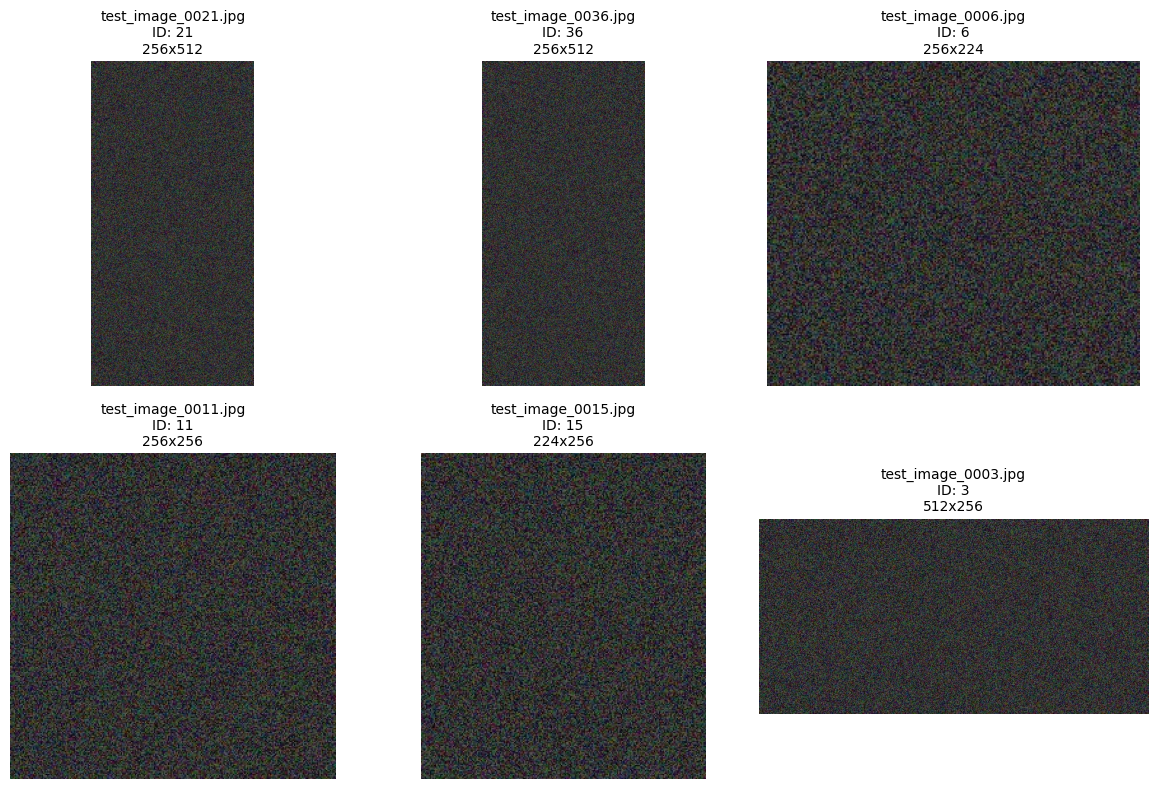


target = 1 (n=6)


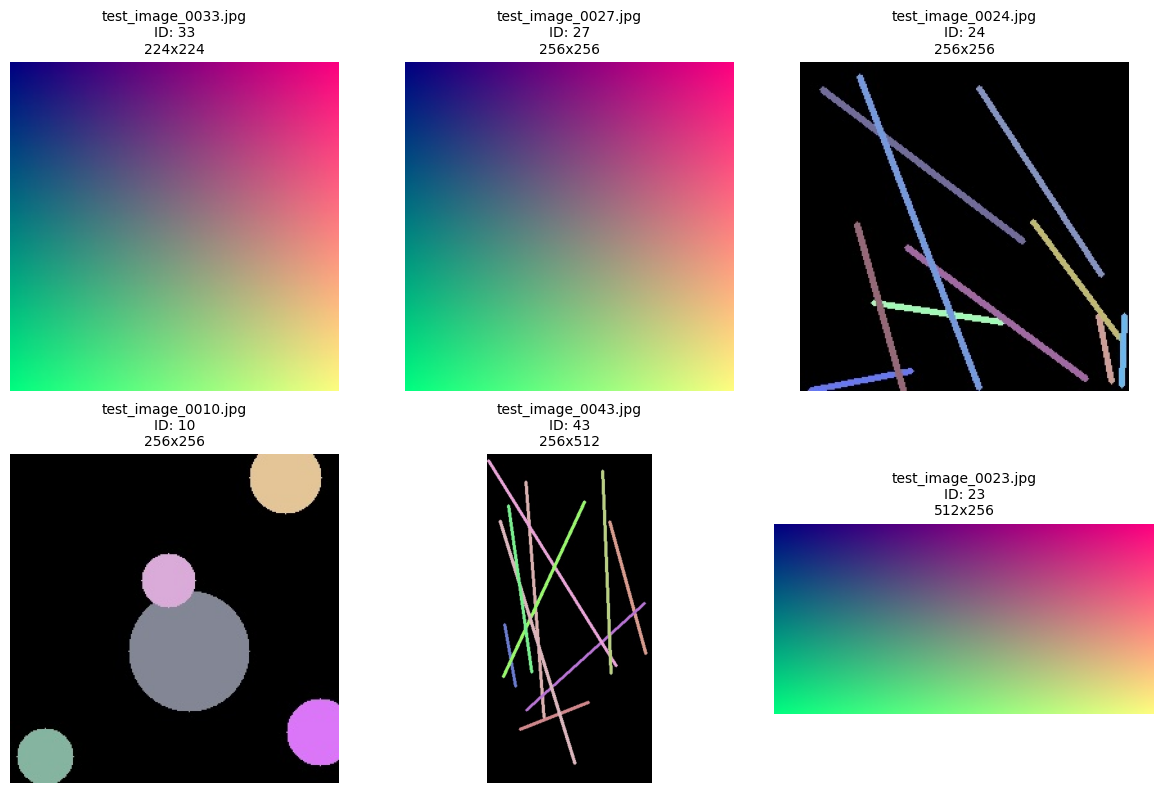

In [18]:
# Create explorer
explorer = photo_tools.ImageDataExplorer(df_with_images, image_col='path')

# Show sample images by target class
explorer.explore_by_target('target', n_samples=6)